In [787]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [788]:
whale_file_path = Path('../Desktop/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/whale_returns.csv')
algo_file_path = Path('../Desktop/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/algo_returns.csv')
sp500_file_path = Path('../Desktop/RU-HOU-FIN-PT-07-2019-U-C/hw/03-Python_and_Pandas/Instructions/Resources/sp500_history.csv')


In [789]:
whale_returns_csv = pd.read_csv(whale_file_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
whale_returns_csv.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [790]:
whale_returns_csv.index.dtype

dtype('<M8[ns]')

In [791]:
whale_returns_csv.sample(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-12-11,-0.015554,-0.008345,-0.017981,-0.034280
2018-09-21,-0.001724,-0.000370,-0.006489,-0.001485
2015-12-22,0.005509,0.003882,0.017028,0.001559
2017-08-01,-0.002368,-0.001991,-0.009821,0.005302
2018-05-31,-0.008054,-0.006034,-0.017407,0.002284
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140
2015-10-28,0.016201,0.006398,0.006545,0.011545
2016-06-21,-0.000260,-0.006424,0.001887,-0.007710
2017-11-30,0.000845,-0.004038,0.004975,0.001692


In [792]:
whale_returns_csv.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


In [793]:
whale_returns_csv.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
count,1059.000000,1059.000000,1059.000000,1059.000000
mean,0.000179,-0.000203,-0.000081,0.000501
std,0.007842,0.006977,0.010824,0.012831
min,-0.032711,-0.032099,-0.139820,-0.066505
25%,-0.003594,-0.003961,-0.004746,-0.005515
50%,0.000467,0.000000,0.000232,0.000617
75%,0.004292,0.003567,0.005176,0.007516
max,0.042977,0.029338,0.080705,0.061341


In [794]:
whale_returns_csv.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object

In [795]:
whale_returns_csv.count()

SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [796]:
whale_returns_csv.isnull().mean() * 100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [797]:
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [798]:
whale_returns_csv = whale_returns_csv.dropna()
whale_returns_csv.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [799]:
whale_returns_csv.duplicated(keep='first').sum()


38

In [800]:
whale_returns_csv = whale_returns_csv.drop_duplicates()

In [801]:
whale_returns_csv.count()


SOROS FUND MANAGEMENT LLC      1021
PAULSON & CO.INC.              1021
TIGER GLOBAL MANAGEMENT LLC    1021
BERKSHIRE HATHAWAY INC         1021
dtype: int64

In [802]:
algo_daily_returns_csv = pd.read_csv(algo_file_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_daily_returns_csv.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [803]:
algo_daily_returns_csv.index.dtype

dtype('<M8[ns]')

In [804]:
algo_daily_returns_csv.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [805]:
algo_daily_returns_csv.sample(10)

,Algo 1,Algo 2
Date,,
2015-07-01,-0.007847,0.002724
2018-02-14,0.015205,0.017153
2018-11-21,0.015159,0.011558
2014-08-22,-0.005166,-0.000235
2018-04-19,0.006710,-0.005309
2016-12-23,0.000475,0.005957
2019-03-08,0.007106,-0.002993
2017-07-28,0.001848,-0.000924
2017-08-16,-0.002468,0.003206


In [806]:
algo_daily_returns_csv.describe()

,Algo 1,Algo 2
count,1241.000000,1235.000000
mean,0.000667,0.000341
std,0.007972,0.008466
min,-0.030951,-0.036937
25%,-0.003238,-0.003733
50%,0.000135,0.000581
75%,0.003978,0.005194
max,0.098246,0.083734


In [807]:
algo_daily_returns_csv.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [808]:
algo_daily_returns_csv.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [809]:
algo_daily_returns_csv.isnull().mean() * 100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [810]:
algo_daily_returns_csv.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [811]:
algo_daily_returns_csv = algo_daily_returns_csv.dropna()

In [812]:
algo_daily_returns_csv.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [813]:
algo_daily_returns_csv.duplicated(keep='first').sum()

0

In [814]:
algo_daily_returns_csv.count()

Algo 1    1235
Algo 2    1235
dtype: int64

In [815]:
sp500_returns = pd.read_csv(sp500_file_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sp500_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [816]:
sp500_returns.index.dtype

dtype('<M8[ns]')

In [817]:
sp500_returns.tail()

,Close
Date,
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99
2012-10-02,$1445.75
2012-10-01,$1444.49


In [818]:
sp500_returns = sp500_returns.sort_index()

In [819]:
sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [820]:
sp500_returns.sample(10)

,Close
Date,
2016-10-17,$2126.50
2015-04-23,$2112.93
2017-10-20,$2575.21
2017-07-25,$2477.13
2019-04-16,$2907.06
2015-03-10,$2044.16
2014-12-17,$2012.89
2018-01-31,$2823.81
2016-07-18,$2166.89


In [821]:
sp500_returns.describe()

,Close
count,1649
unique,1639
top,$2268.90
freq,2


In [822]:
sp500_returns.dtypes

Close    object
dtype: object

In [823]:
sp500_returns['Close'] = sp500_returns['Close'].str.replace('$', '' )
sp500_returns.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [824]:
sp500_returns['Close'] = sp500_returns['Close'].astype('float')
sp500_returns.dtypes

Close    float64
dtype: object

In [825]:
sp500_returns.count()

Close    1649
dtype: int64

In [826]:
sp500_returns.duplicated(keep='first').sum()

10

In [827]:
sp500_returns = sp500_returns.drop_duplicates()
sp500_returns.count()

Close    1639
dtype: int64

In [828]:
sp500_returns = sp500_returns.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [829]:
sp500_returns.isnull().mean() * 100

Close    0.061013
dtype: float64

In [830]:
sp500_returns.isnull().sum()

Close    1
dtype: int64

In [831]:
sp500_returns = sp500_returns.dropna()
sp500_returns.isnull().sum()

Close    0
dtype: int64

In [832]:
sp500_returns = sp500_returns.rename(columns = {'Close':'S&P 500'})
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [833]:
all_returns = pd.concat([whale_returns_csv, algo_daily_returns_csv, sp500_returns], axis =1 , join = 'inner')
all_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [834]:
all_returns.index.dtype

dtype('<M8[ns]')

In [835]:
all_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


In [836]:
all_returns.index = pd.to_datetime(all_returns.index) 
all_returns.index.dtype

dtype('<M8[ns]')

In [837]:
all_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P 500                        0
dtype: int64

In [838]:
all_returns.dtypes

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
Algo 1                         float64
Algo 2                         float64
S&P 500                        float64
dtype: object

In [839]:
all_returns.duplicated().sum()

0

In [840]:
all_returns.count()

SOROS FUND MANAGEMENT LLC      1005
PAULSON & CO.INC.              1005
TIGER GLOBAL MANAGEMENT LLC    1005
BERKSHIRE HATHAWAY INC         1005
Algo 1                         1005
Algo 2                         1005
S&P 500                        1005
dtype: int64

In [841]:
all_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841


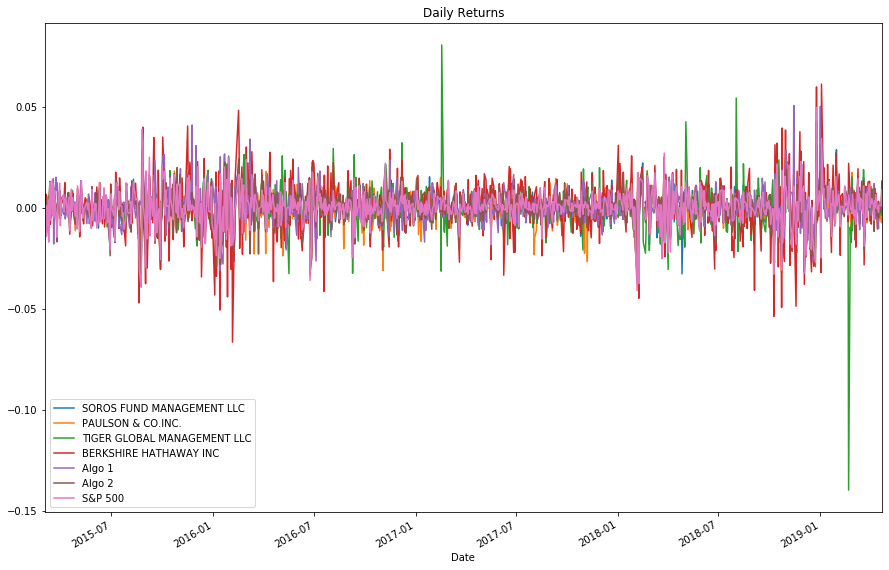

In [842]:
all_returns.plot(title = 'Daily Returns', legend = True, figsize = (15,10))


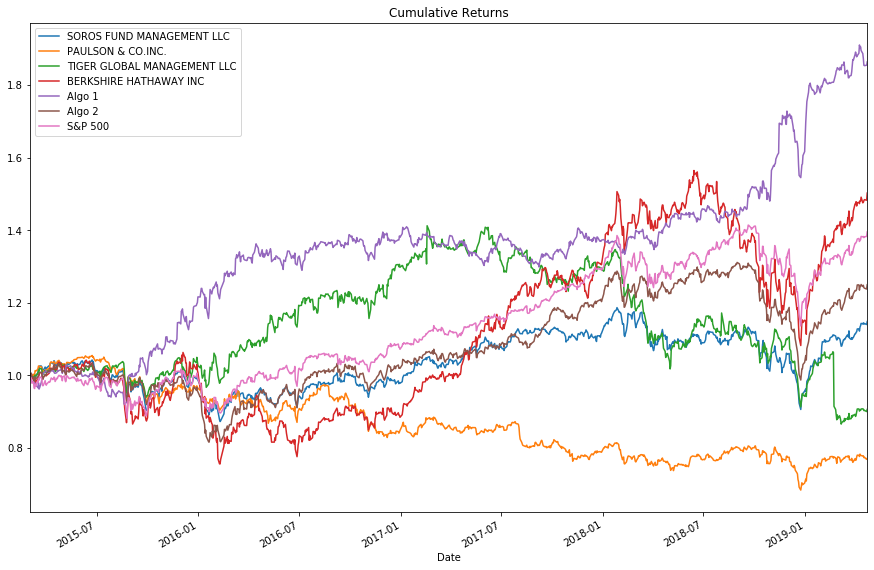

In [843]:
cumulative_returns = (1 + all_returns).cumprod() 
cumulative_returns.plot(title = 'Cumulative Returns', legend = True, figsize =(15,10))

In [844]:
cumulative_returns_by_year = all_returns.groupby(all_returns.index.year).apply(lambda x: (1+x).cumprod() - 1)
annual_returns = cumulative_returns_by_year.groupby(cumulative_returns_by_year.index.year).last()
annual_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015,-0.013231,-0.035512,0.026813,0.007337,0.216065,-0.045911,-0.010680
2016,-0.008781,-0.120673,0.263650,-0.122137,0.134865,0.068303,0.083300
2017,0.140602,-0.070806,-0.003590,0.475275,-0.005604,0.180239,0.202799
2018,-0.142604,-0.107642,-0.271209,-0.117084,0.177758,-0.139009,-0.060491
2019,0.200247,0.096603,-0.038493,0.304057,0.152960,0.206432,0.151889


In [845]:
annual_returns.loc[2017].sort_values(ascending = False)

BERKSHIRE HATHAWAY INC         0.475275
S&P 500                        0.202799
Algo 2                         0.180239
SOROS FUND MANAGEMENT LLC      0.140602
TIGER GLOBAL MANAGEMENT LLC   -0.003590
Algo 1                        -0.005604
PAULSON & CO.INC.             -0.070806
Name: 2017, dtype: float64

In [846]:
cumulative_returns_by_month = all_returns.groupby(pd.Grouper(freq = 'M')).apply(lambda x: (1+x).cumprod() - 1)
monthly_returns = cumulative_returns_by_month.groupby(pd.Grouper(freq='M')).last()
monthly_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-31,0.017207,0.011306,0.009419,0.002310,0.012788,-0.000962,-0.023378
2015-04-30,0.003248,0.016876,0.010373,0.011927,-0.007167,0.009620,0.008521
2015-05-31,0.008094,0.019797,-0.001410,0.001002,0.005174,-0.005529,-0.000285
2015-06-30,-0.014935,-0.007651,-0.014254,-0.008842,-0.002467,0.002462,-0.021012
2015-07-31,-0.014779,-0.018293,0.020172,-0.021668,-0.051560,-0.016582,0.019742


In [847]:
monthly_returns.loc['2018-12-31'].sort_values(ascending = False)

Algo 1                        -0.055161
BERKSHIRE HATHAWAY INC        -0.089757
PAULSON & CO.INC.             -0.091320
S&P 500                       -0.091777
SOROS FUND MANAGEMENT LLC     -0.095657
Algo 2                        -0.119221
TIGER GLOBAL MANAGEMENT LLC   -0.144032
Name: 2018-12-31 00:00:00, dtype: float64

In [937]:
daily_std = all_returns.std().sort_values()
daily_std.head(10)

PAULSON & CO.INC.              0.007126
Algo 1                         0.007672
SOROS FUND MANAGEMENT LLC      0.008020
Algo 2                         0.008329
S&P 500                        0.008609
TIGER GLOBAL MANAGEMENT LLC    0.010899
BERKSHIRE HATHAWAY INC         0.013097
dtype: float64

In [945]:
daily_std > daily_std[4]

PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

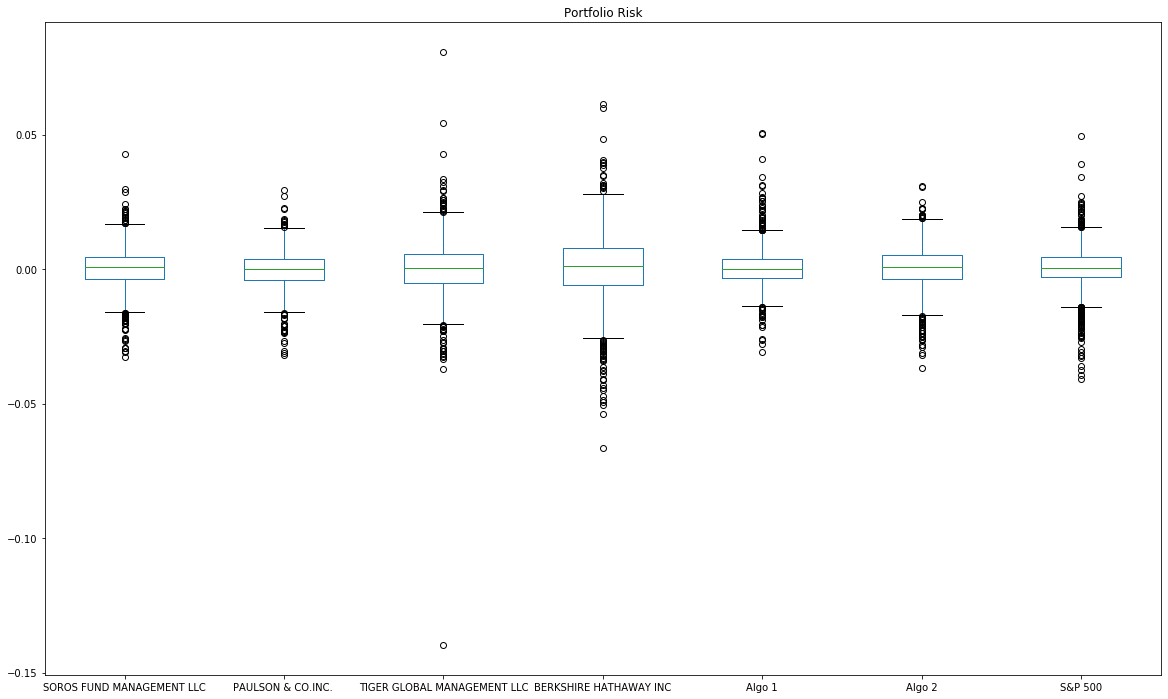

In [934]:
all_returns.plot(kind = 'box', figsize = (22,12), title = 'Portfolio Risk')

In [947]:
annualized_std = daily_std * np.sqrt(252)
annualized_std.head(6)

PAULSON & CO.INC.              0.113119
Algo 1                         0.121793
SOROS FUND MANAGEMENT LLC      0.127306
Algo 2                         0.132223
S&P 500                        0.136666
TIGER GLOBAL MANAGEMENT LLC    0.173015
dtype: float64

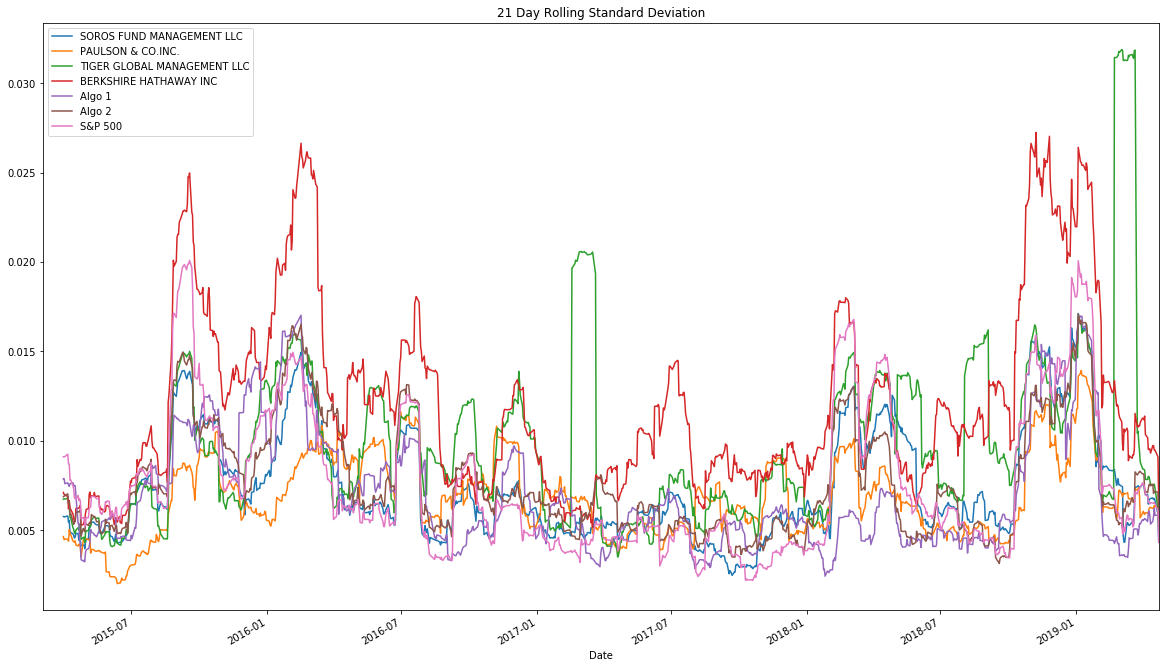

In [952]:
all_returns.rolling(window = 21).std().plot(title = '21 Day Rolling Standard Deviation', figsize= (20,12))

In [954]:
correlation = all_returns.corr()
correlation.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.698448,0.568982,0.753658,0.319894,0.841109,0.845195
PAULSON & CO.INC.,0.698448,1.000000,0.437306,0.542352,0.266163,0.688212,0.677540
TIGER GLOBAL MANAGEMENT LLC,0.568982,0.437306,1.000000,0.424546,0.167658,0.522955,0.630243
BERKSHIRE HATHAWAY INC,0.753658,0.542352,0.424546,1.000000,0.288943,0.698347,0.758088
Algo 1,0.319894,0.266163,0.167658,0.288943,1.000000,0.281854,0.274479
Algo 2,0.841109,0.688212,0.522955,0.698347,0.281854,1.000000,0.854255
S&P 500,0.845195,0.677540,0.630243,0.758088,0.274479,0.854255,1.000000


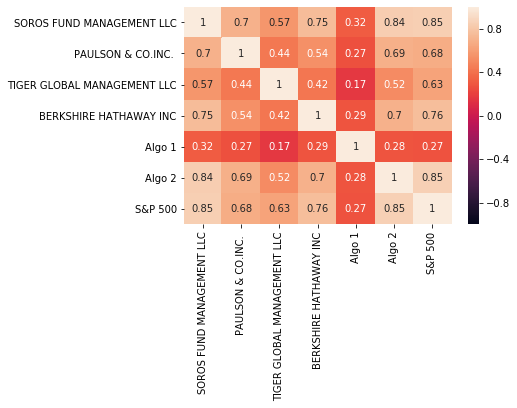

In [955]:
sns.heatmap(correlation, vmin = -1, vmax = 1, annot = True)

In [957]:
covariance = all_returns['SOROS FUND MANAGEMENT LLC'].cov(all_returns['S&P 500'])
print(covariance)

5.835347932698347e-05


In [958]:
variance = all_returns['S&P 500'].var()
print(variance)

7.411777878693682e-05


In [960]:
Soros_beta = covariance / variance
print(Soros_beta)

0.7873074487934899


In [ ]:
ewm_rolling_21_average = 